In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [2]:

def getData_half(cfileName):
    """
    Reads only the first half of the complex samples from a .cfile.
    The file is assumed to contain interleaved float32 I and Q samples.
    """
    # Get file size in bytes
    file_size = os.path.getsize(cfileName)
    # Determine total number of float32 samples in the file
    num_floats = file_size // 4
    # Each complex sample requires 2 floats.
    # The full complex array would have num_floats//2 elements.
    # To get only half of that, we need to read:
    count = (num_floats // 4) * 2  # (num_floats//4 complex samples)
    
    # Read only 'count' float32 numbers from the file
    data = np.fromfile(cfileName, dtype="float32", count=count)
    
    # Form complex samples: every pair (I, Q)
    data_complex = data[0::2] + 1j * data[1::2]
    
    return data_complex



In [3]:
def getData_one_sixth(cfileName):
    # Get file size in bytes.
    file_size = os.path.getsize(cfileName)
    # Each float32 is 4 bytes.
    num_floats = file_size // 4
    # Each complex sample consists of 2 floats.
    total_complex_samples = num_floats // 2
    # One-sixth of the complex samples.
    one_sixth_complex_samples = total_complex_samples // 6
    # Since each complex sample is 2 floats, calculate the count.
    count = one_sixth_complex_samples * 2
    # Read only the required number of float32 values.
    data = np.fromfile(cfileName, dtype="float32", count=count)
    # Convert to complex samples.
    complex_data = data[0::2] + 1j * data[1::2]
    return complex_data


In [5]:

fft_size = 2048  # FFT window size
fft_overlap = 125  # overlap between segments


/home/rasi/rasi/research/msc/side-channel/master_reseach/analysis/h1/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


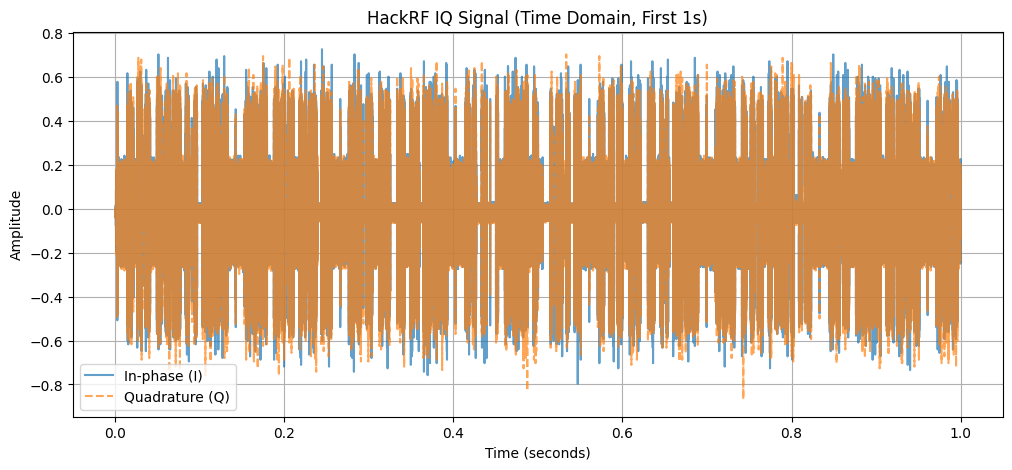

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define HackRF sampling rate
fs = 20e6  # 20 MHz sample rate
duration_s = 1  # Extract 1 second of data
samples_to_read = int(fs * duration_s)  # Total samples in 1 second

# Load the binary file (assuming float32 interleaved I/Q data)
filename = "/media/rasi/Other/data/API-Security/hypothesis1/autheticated_firemware/original"  # Replace with your file
raw_data = np.fromfile(filename, dtype=np.float32, count=samples_to_read * 2)  # I/Q are interleaved

# Separate I (real) and Q (imaginary) components
I_data = raw_data[0::2]  # In-phase component
Q_data = raw_data[1::2]  # Quadrature component

# Generate time axis
time_axis = np.arange(samples_to_read) / fs  # Convert samples to seconds

# Plot Time-Domain Representation
plt.figure(figsize=(12, 5))
plt.plot(time_axis, I_data, label="In-phase (I)", alpha=0.7)
plt.plot(time_axis, Q_data, label="Quadrature (Q)", linestyle="dashed", alpha=0.7)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("HackRF IQ Signal (Time Domain, First 1s)")
plt.legend()
plt.grid()
plt.show()


In [5]:
original_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/autheticated_firemware/original")
print(original_half.shape)

(212153772,)


# Authenicated Code

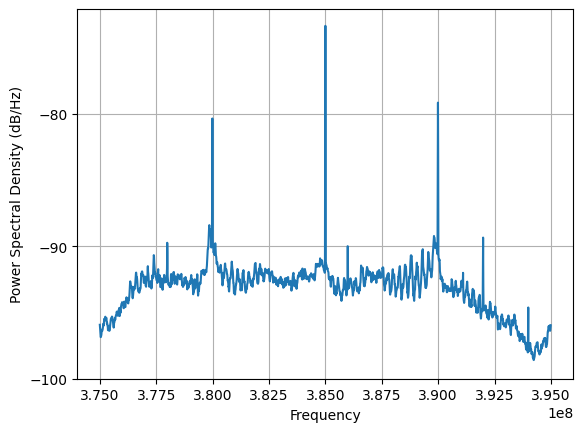

In [6]:
fig = plt.figure()
plt.psd(original_half, NFFT=fft_size, Fc=385e6, Fs=20e6)
plt.show()

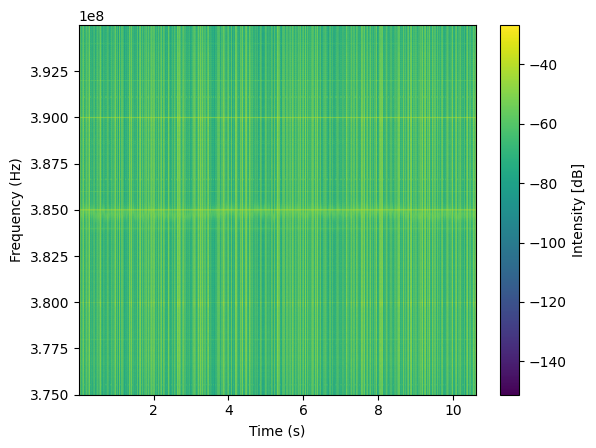

In [7]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(original_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del original_half, pxx, freq, t, cax

In [3]:
remove_rgn_half = getData("/home/rasi/rasi/research/msc/side-channel/data/test/20msisdn_authentic.cfile")
print(remove_rgn_half.shape)

(149478093,)


# Represent Unautheticated API

### Remove Random Generated number API

In [8]:
remove_rgn_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/remove_rgn")
print(remove_rgn_half.shape)

(211748722,)


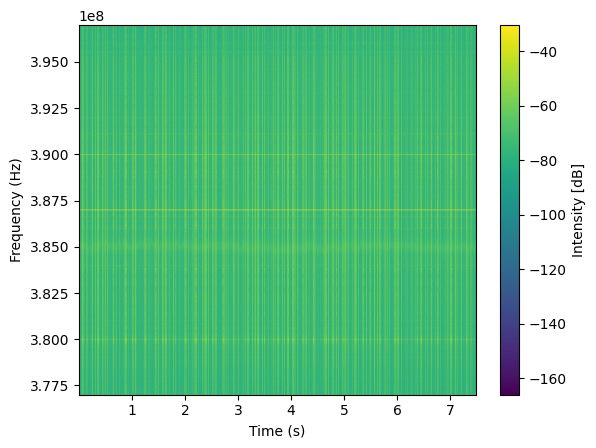

In [6]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(remove_rgn_half, NFFT=fft_size, Fs=20e6, Fc=387e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del remove_rgn_half, pxx, freq, t, cax

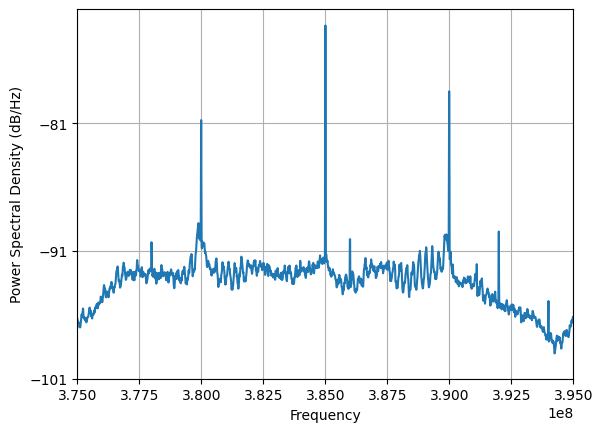

In [9]:
fig = plt.figure()
plt.psd(remove_rgn_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

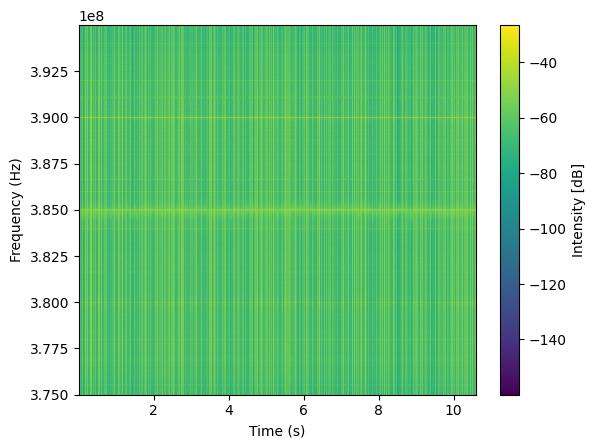

In [10]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(remove_rgn_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del remove_rgn_half, pxx, freq, t, cax

### PING API

In [11]:
ping_first_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_first")
print(ping_first_half.shape)

(211288125,)


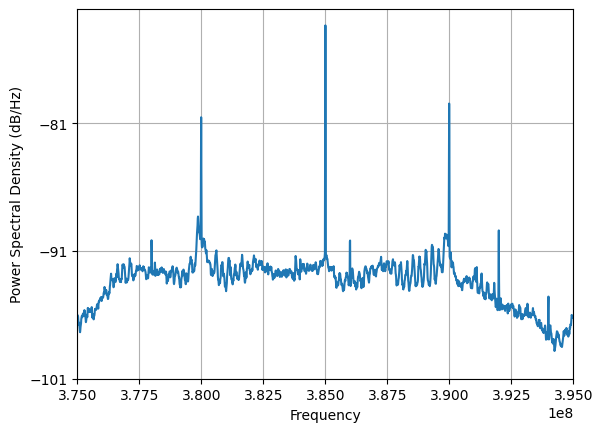

In [12]:
fig = plt.figure()
plt.psd(ping_first_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

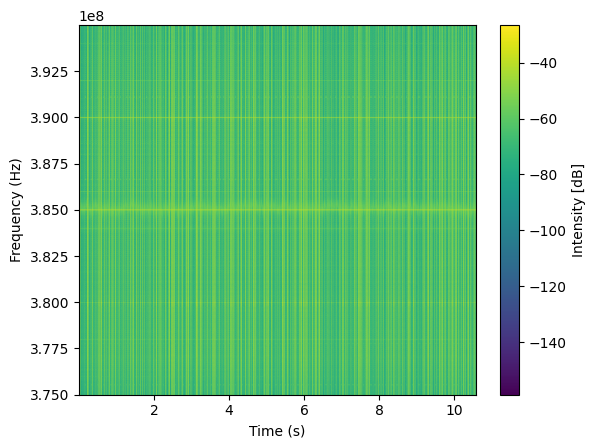

In [14]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(ping_first_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del ping_first_half, pxx, freq, t, cax

In [15]:
ping_middle_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_middle")
print(ping_middle_half.shape)

(214828233,)


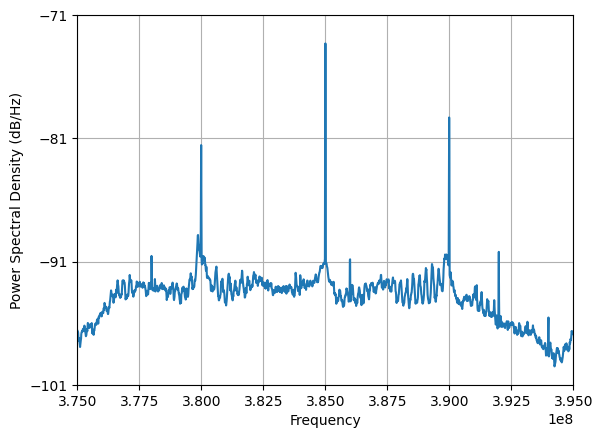

In [16]:
fig = plt.figure()
plt.psd(ping_middle_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

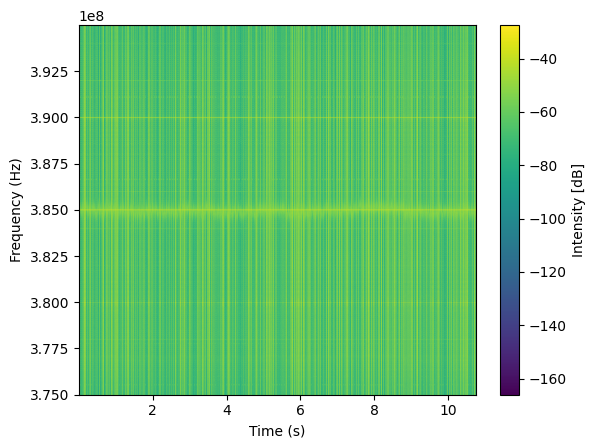

In [17]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(ping_middle_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del ping_middle_half, pxx, freq, t, cax

In [18]:
ping_last_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/ping_last")
print(ping_last_half.shape)

(212337083,)


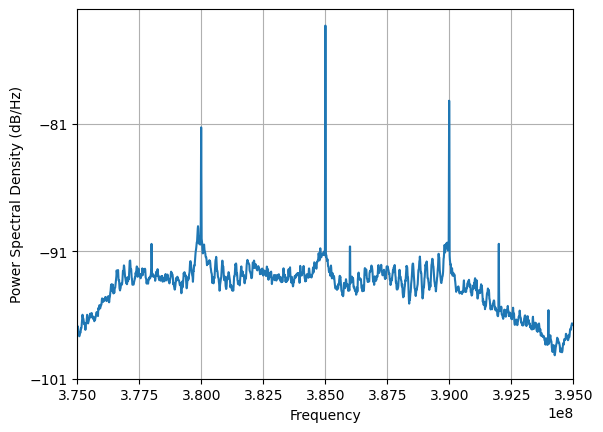

In [19]:
fig = plt.figure()
plt.psd(ping_last_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(ping_last_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del ping_last_half, pxx, freq, t, cax

# Info Gather API

In [20]:
info_gather_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/infoGather")
print(info_gather_half.shape)

(210503583,)


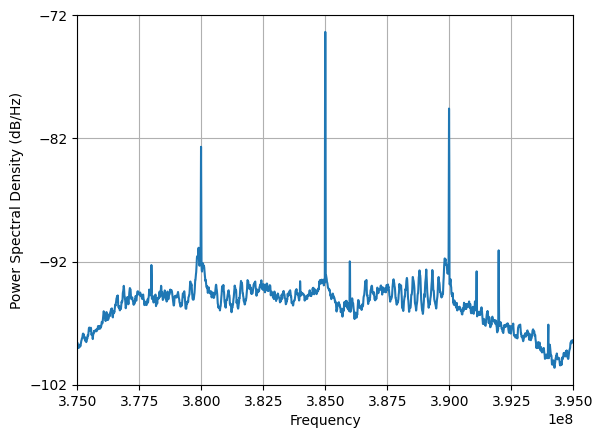

In [21]:
fig = plt.figure()
plt.psd(info_gather_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(info_gather_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del info_gather_half, pxx, freq, t, cax

# Update Weather API

In [16]:
update_weather_half = getData_half("/media/rasi/Other/data/API-Security/hypothesis1/unauthenticated_firemware/update_weatherRequest_different_payload")
print(update_weather_half.shape)

(212010598,)


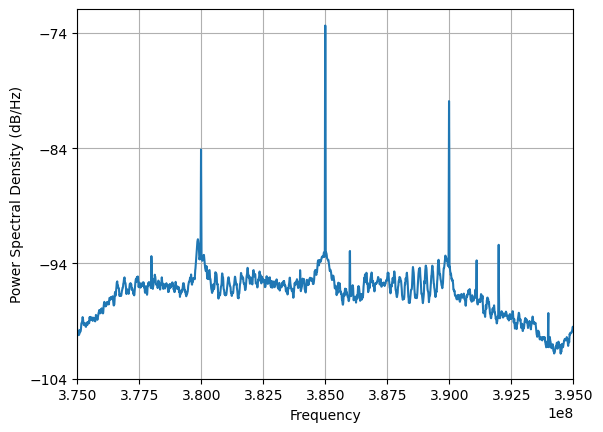

In [17]:
fig = plt.figure()
plt.psd(update_weather_half, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()

In [ ]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(update_weather_half, NFFT=fft_size, Fs=20e6, Fc=385e6, mode='magnitude')

fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()
del update_weather_half, pxx, freq, t, cax

# H2

In [4]:
low= getData_one_sixth("/media/rasi/Other/data/API-Security/hypothesis2/traning/low")
print(low.shape)

(195560075,)


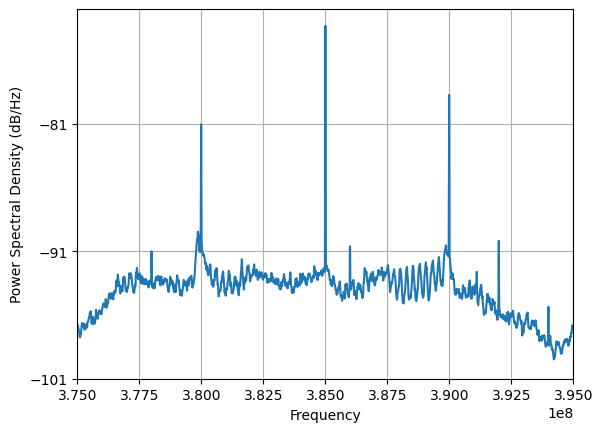

In [7]:
fig = plt.figure()
plt.psd(low, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()
del low

In [8]:
moderate= getData_one_sixth("/media/rasi/Other/data/API-Security/hypothesis2/traning/moderate")
print(moderate.shape)

(195581304,)


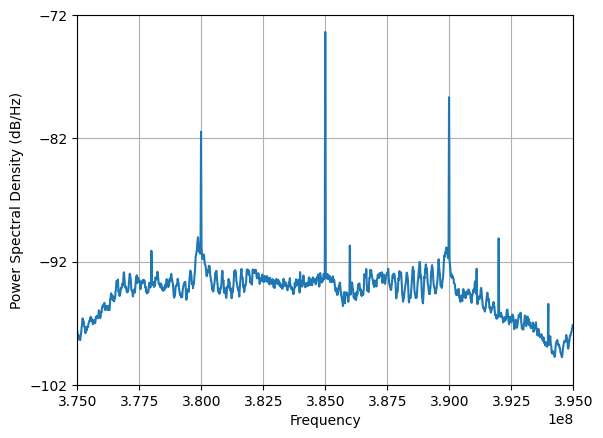

In [9]:
fig = plt.figure()
plt.psd(moderate, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()
del moderate

In [10]:
high= getData_one_sixth("/media/rasi/Other/data/API-Security/hypothesis2/traning/high")
print(high.shape)

(194729849,)


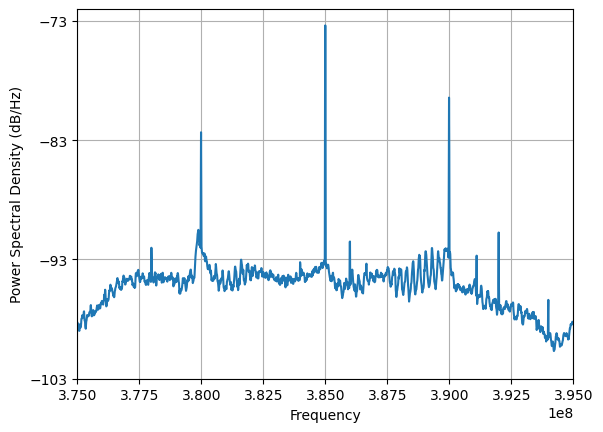

In [12]:
fig = plt.figure()
plt.psd(high, NFFT=2048, Fc=385e6, Fs=20e6)
plt.xlim(375e6, 395e6)
plt.show()
del high